##################################################################

#############   PART 2 Using the trip_data Dataset ###############

##################################################################



In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA


In [52]:
trip_data=pd.read_csv("D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Exam_setup/nyc_taxi_Jan_2022_decision.csv")
print(trip_data.head())

   trip_distance  passenger_count  payment_type  extra  tip_amount  \
0           0.90                2             2    2.5        0.00   
1           1.40                1             1    0.0        2.06   
2           1.14                1             1    0.5        2.06   
3           0.50                1             2    3.5        0.00   
4           2.33                1             1    1.0        2.96   

   fare_amount  trip_times total_amount  
0          5.5    5.200000          Low  
1          7.0    6.300000       Medium  
2          6.5    6.983333       Medium  
3          4.5    4.216667          Low  
4         10.5   12.266667       Medium  


In [3]:
trip_data = trip_data.sample(n=100, random_state=1)

### Because the data is already clean and ready - I can seperate it
### into TRAINING and TESTING sets

In [53]:
from sklearn.model_selection import train_test_split
trip_dataTrainDF_Num, trip_dataTestDF_Num = train_test_split(trip_data, test_size=0.3)

In [55]:
trip_dataTestDF_Num

,trip_distance,passenger_count,payment_type,extra,tip_amount,fare_amount,trip_times,total_amount
1743,1.05,1,1,1.0,2.58,6.0,6.000000,Medium
1453,3.20,2,2,3.5,0.00,14.0,15.750000,Medium
330,1.82,1,1,0.5,2.00,9.0,9.166667,Medium
1958,3.96,1,1,0.0,1.00,16.5,22.550000,High
1645,1.04,1,2,0.5,0.00,5.5,4.850000,Low
...,...,...,...,...,...,...,...,...
224,1.50,1,1,1.0,1.00,7.5,7.216667,Medium
955,2.42,2,1,0.0,2.86,11.0,14.450000,Medium
342,14.95,1,1,4.5,12.77,52.0,40.283333,High
493,2.15,1,2,0.5,0.00,11.0,15.433333,Medium


## Seperate LABELS FROM DATA--------------------
## Make sure you know the name of the label 
## For both datasets above  - in this case - it is "Decision"


In [58]:
## TEST - Num
trip_dataTestLabels_Num=trip_dataTestDF_Num["total_amount"]  ## save labels
print(trip_dataTestLabels_Num)
trip_dataTestData_Num = trip_dataTestDF_Num.drop(["total_amount"], axis=1)  ##drop labels
print(trip_dataTestData_Num)

1743    Medium
1453    Medium
330     Medium
1958      High
1645       Low
         ...  
224     Medium
955     Medium
342       High
493     Medium
293     Medium
Name: total_amount, Length: 600, dtype: object
      trip_distance  passenger_count  payment_type  extra  tip_amount  \
1743           1.05                1             1    1.0        2.58   
1453           3.20                2             2    3.5        0.00   
330            1.82                1             1    0.5        2.00   
1958           3.96                1             1    0.0        1.00   
1645           1.04                1             2    0.5        0.00   
...             ...              ...           ...    ...         ...   
224            1.50                1             1    1.0        1.00   
955            2.42                2             1    0.0        2.86   
342           14.95                1             1    4.5       12.77   
493            2.15                1             2    0.5 

In [57]:
trip_dataTestData_Num

,trip_distance,passenger_count,payment_type,extra,tip_amount,fare_amount,trip_times
1743,1.05,1,1,1.0,2.58,6.0,6.000000
1453,3.20,2,2,3.5,0.00,14.0,15.750000
330,1.82,1,1,0.5,2.00,9.0,9.166667
1958,3.96,1,1,0.0,1.00,16.5,22.550000
1645,1.04,1,2,0.5,0.00,5.5,4.850000
...,...,...,...,...,...,...,...
224,1.50,1,1,1.0,1.00,7.5,7.216667
955,2.42,2,1,0.0,2.86,11.0,14.450000
342,14.95,1,1,4.5,12.77,52.0,40.283333
493,2.15,1,2,0.5,0.00,11.0,15.433333


In [6]:
## TRAIN - Num
trip_dataTrainLabels_Num=trip_dataTrainDF_Num["total_amount"]  ## save labels
print(trip_dataTrainLabels_Num)
trip_dataTrainData_Num = trip_dataTrainDF_Num.drop(["total_amount"], axis=1)  ##drop labels
print(trip_dataTrainData_Num)




730     Medium
367     Medium
1053    Medium
447       High
1068    Medium
         ...  
1027    Medium
111     Medium
1496    Medium
631       High
282       High
Name: total_amount, Length: 70, dtype: object
      trip_distance  passenger_count  payment_type  extra  tip_amount  \
730            1.84                1             1    0.0        2.46   
367            2.12                1             1    0.0        3.45   
1053           1.62                1             2    0.0        0.00   
447            8.09                1             1    0.0        3.00   
1068           2.00                1             1    0.0        2.86   
...             ...              ...           ...    ...         ...   
1027           1.06                1             1    0.0        2.46   
111            2.22                1             2    1.0        0.00   
1496           2.70                2             1    2.5        1.00   
631           19.70                1             1    0.0  

In [66]:
y_class_names=list(trip_dataTrainDF_Num["total_amount"].unique())

In [7]:
## TEST - Num
print(trip_dataTestLabels_Num)
print(trip_dataTestData_Num)
## TRAIN - Num
print(trip_dataTrainLabels_Num)
print(trip_dataTrainData_Num)


1624    Medium
1688    Medium
1464       Low
558     Medium
718     Medium
1256    Medium
1821      High
87      Medium
655     Medium
1227    Medium
120        Low
48      Medium
126     Medium
1135       Low
1971    Medium
1712      High
1761      High
1315      High
1468    Medium
1701    Medium
872     Medium
1842    Medium
693       High
1960    Medium
1886    Medium
729     Medium
1149    Medium
1728      High
613        Low
808       High
Name: total_amount, dtype: object
      trip_distance  passenger_count  payment_type  extra  tip_amount  \
1624           2.28                1             1   0.00        1.70   
1688           1.71                1             1   0.50        2.46   
1464           0.30                1             3   3.50        0.00   
558            2.28                2             1   1.00        2.56   
718            1.90                2             1   3.50        2.85   
1256           0.70                1             1   2.50        4.00   
1821 

In [24]:
trip_dataTestLabels_Num

1624    Medium
1688    Medium
1464       Low
558     Medium
718     Medium
1256    Medium
1821      High
87      Medium
655     Medium
1227    Medium
120        Low
48      Medium
126     Medium
1135       Low
1971    Medium
1712      High
1761      High
1315      High
1468    Medium
1701    Medium
872     Medium
1842    Medium
693       High
1960    Medium
1886    Medium
729     Medium
1149    Medium
1728      High
613        Low
808       High
Name: total_amount, dtype: object

In [8]:
###############################################
## SCALE ALL DATA to between 0 and 1
from sklearn import preprocessing
###########################################################

In [9]:
x = trip_dataTrainData_Num.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
trip_dataTrainData_Num_S = pd.DataFrame(x_scaled)

x2 = trip_dataTestData_Num.values #returns a numpy array
min_max_scaler2 = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler2.fit_transform(x2)
trip_dataTestData_Num_S = pd.DataFrame(x_scaled2)
print(trip_dataTestData_Num_S)

           0     1    2         3         4         5         6
0   0.103882  0.00  0.0  0.000000  0.110461  0.125000  0.185942
1   0.073977  0.00  0.0  0.111111  0.159844  0.093750  0.109643
2   0.000000  0.00  1.0  0.777778  0.000000  0.000000  0.000000
3   0.103882  0.25  0.0  0.222222  0.166342  0.093750  0.075698
4   0.083945  0.25  0.0  0.777778  0.185185  0.125000  0.179634
5   0.020986  0.00  0.0  0.555556  0.259909  0.020833  0.064884
6   0.282791  0.00  0.5  0.111111  0.000000  0.291667  0.185641
7   0.036726  0.25  0.5  0.777778  0.000000  0.135417  0.216281
8   0.011542  0.00  0.0  0.111111  0.114360  0.020833  0.054971
9   0.075026  0.00  0.5  0.222222  0.000000  0.093750  0.135777
10  0.010493  0.00  0.0  0.555556  0.129955  0.000000  0.018324
11  0.023610  0.00  0.0  0.222222  0.150747  0.020833  0.015921
12  0.110178  0.00  0.5  0.111111  0.000000  0.125000  0.101532
13  0.040399  0.00  0.0  0.000000  0.107862  0.020833  0.004205
14  0.110703  0.00  0.0  0.111111  0.172

In [13]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#########################################################
#############    Decision Trees   #######################
#########################################################
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
## In Python - the Decision Trees work ONLY on numeric data

In [20]:
#conda install python-graphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.2               |       hd77b12b_6         109 KB
    lib


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3









python-graphviz-0.20 | 63 KB     | ##5        |  25% 







pixman-0.40.0        | 402 KB    | 3          |   4% 









libgd-2.3.3          | 314 KB    | 5          |   5% 


gts-0.7.6            | 181 KB    | ########## | 100% 








pcre-8.45            | 382 KB    | 4          |   4% 











expat-2.4.9          | 207 KB    | 7          |   8% 










graphviz-2.50.0      | 903 KB    | 1          |   2% 












getopt-win32-0.1     | 19 KB     | ########6  |  86% 













graphite2-1.3.14     | 91 KB     | #7         |  18% 














fribidi-1.0.10       | 63 KB     | ##5        |  25% 



pango-1.50.7         | 279 KB    | ########## | 100% 



pango-1.50.7         | 279 KB    | ########## | 100% 






python-graphviz-0.20 | 63 KB     | ########## | 100% 






python-graphviz-0.20 | 63 KB     | ########## | 100% 
harfbuzz-4.3.0       | 855 KB    | ########## | 100% 
harfbuzz-4.3.0       | 855 KB    | ########## | 100% 







pixman-0.40.0       

In [10]:
#---------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

In [68]:
MyDT_R=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,
                            class_weight=None)

[Text(0.5769230769230769, 0.9, 'X[5] <= 14.25\nentropy = 1.294\nsamples = 70\nvalue = [14, 11, 45]'),
 Text(0.3076923076923077, 0.7, 'X[6] <= 5.567\nentropy = 0.729\nsamples = 54\nvalue = [0, 11, 43]'),
 Text(0.15384615384615385, 0.5, 'X[4] <= 1.705\nentropy = 0.954\nsamples = 16\nvalue = [0, 10, 6]'),
 Text(0.07692307692307693, 0.3, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.23076923076923078, 0.3, 'X[6] <= 3.667\nentropy = 0.592\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.15384615384615385, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3076923076923077, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.46153846153846156, 0.5, 'X[0] <= 0.89\nentropy = 0.176\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.38461538461538464, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5384615384615384, 0.3, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]'),
 Text(0.8461538461538461, 0.7, 'X[0] <= 3.465\nentropy = 0.544\nsamples = 16\nvalue = [

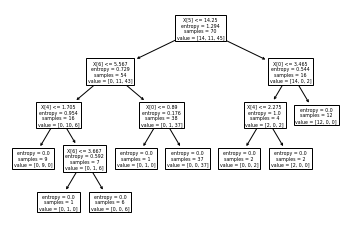

In [69]:
## perform DT
MyDT_R.fit(trip_dataTrainData_Num, trip_dataTrainLabels_Num)
    ## plot the tree
tree.plot_tree(MyDT_R)

In [13]:
feature_namesR=trip_dataTrainData_Num.columns
print(feature_namesR)

Index(['trip_distance', 'passenger_count', 'payment_type', 'extra',
       'tip_amount', 'fare_amount', 'trip_times'],
      dtype='object')


## Visualize the tree

In [70]:
##--------------------------------------------------------
## VIS 1 saved as Tree_Record.pdf
##-----------------------------------------------------------
TREE_data = tree.export_graphviz(MyDT_R, out_file=None,
                  feature_names=trip_dataTrainData_Num.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True,class_names=y_class_names) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("Tree_Record_small_3") 

'Tree_Record_small_3.pdf'

## Confusion Matrix

In [18]:
##---
## Show the predictions from the DT on the test set
#print("\nActual\n")
#print(StudentTestLabels_Num)
#print("Prediction\n")
DT_pred_R=MyDT_R.predict(trip_dataTestData_Num)
#print(DT_pred_R)
##_--
## Show the confusion matrix
bn_matrix_R = confusion_matrix(trip_dataTestLabels_Num, DT_pred_R)
print("\nThe confusion matrix is:")
print(bn_matrix_R)


The confusion matrix is:
[[ 7  0  0]
 [ 0  4  0]
 [ 0  4 15]]


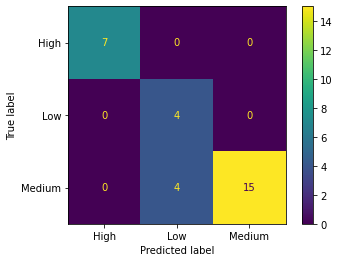

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=bn_matrix_R, display_labels = MyDT_R.classes_)
disp.plot()
plt.show()

## Feature Importance

In [19]:
##---
## Feature Importance
FeatureImpR=MyDT_R.feature_importances_   
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
print ("feature name: ", feature_namesR[indicesR])

feature name:  Index(['fare_amount', 'trip_times', 'tip_amount', 'trip_distance', 'extra',
       'payment_type', 'passenger_count'],
      dtype='object')


In [20]:
## print out the important features.....
for f in range(trip_dataTrainData_Num.shape[1]):
    if FeatureImpR[indicesR[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indicesR[f], FeatureImpR[indicesR[f]]))
        print ("feature name: ", feature_namesR[indicesR[f]])

1. feature 5 (0.469104)
feature name:  fare_amount
2. feature 6 (0.238297)
feature name:  trip_times
3. feature 4 (0.167064)
feature name:  tip_amount
4. feature 0 (0.125536)
feature name:  trip_distance


#### Feature Importance Chart

In [43]:

feat_dict= {}
for col, val in sorted(zip(trip_dataTrainData_Num.columns, MyDT_R.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [44]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

In [45]:
feat_df

,Feature,Importance
0,fare_amount,0.469104
1,trip_times,0.238297
2,tip_amount,0.167064
3,trip_distance,0.125536
4,passenger_count,0.000000
5,payment_type,0.000000
6,extra,0.000000


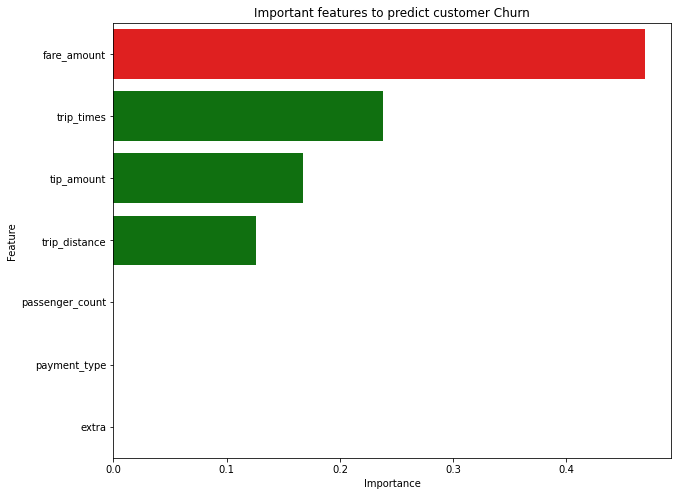

In [46]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

## Testing

In [25]:
from sklearn.metrics import classification_report
print(classification_report(trip_dataTestLabels_Num, DT_pred_R))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       0.50      1.00      0.67         4
      Medium       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.83      0.93      0.85        30
weighted avg       0.93      0.87      0.88        30



In [36]:
trip_dataTestData_Num

,trip_distance,passenger_count,payment_type,extra,tip_amount,fare_amount,trip_times
1624,2.28,1,1,0.00,1.70,10.0,12.916667
1688,1.71,1,1,0.50,2.46,8.5,8.683333
1464,0.30,1,3,3.50,0.00,4.0,2.600000
558,2.28,2,1,1.00,2.56,8.5,6.800000
718,1.90,2,1,3.50,2.85,10.0,12.566667
1256,0.70,1,1,2.50,4.00,5.0,6.200000
1821,5.69,1,2,0.50,0.00,18.0,12.900000
87,1.00,2,2,3.50,0.00,10.5,14.600000
655,0.52,1,1,0.50,1.76,5.0,5.650000
1227,1.73,1,2,1.00,0.00,8.5,10.133333


In [37]:
fit_accuracy = MyDT_R.score(trip_dataTrainData_Num, trip_dataTrainLabels_Num) #fit_accuracy = decision_tree.score(X_train, y_train)
test_accuracy = MyDT_R.score(trip_dataTestData_Num, trip_dataTestLabels_Num) #test_accuracy = decision_tree.score(X_test, y_test)
    

print(f"Train accuracy: {fit_accuracy:0.2%}")
print(f"Test accuracy: {test_accuracy:0.2%}")

Train accuracy: 100.00%
Test accuracy: 86.67%


## Best parameters and accuracy Score

In [39]:
X = trip_data[['trip_distance', 'passenger_count','payment_type','extra','tip_amount','fare_amount','trip_times']]
y = trip_data[['total_amount']]

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# specify the hyperparameters you want to tune
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5,12),
    'min_samples_split': range(1,12),
    'min_samples_leaf': range(1, 12)
}

# create a decision tree classifier
dtc = DecisionTreeClassifier()

# create a grid search object
grid_search = GridSearchCV(dtc, parameters, cv=5)

# fit the grid search object to your data
grid_search.fit(X, y)

# print the best hyperparameters and corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score:  0.96


C:\Users\Nikhi\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
770 fits failed out of a total of 8470.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
770 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nikhi\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nikhi\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\Nikhi\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C